In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
data_dir = os.getcwd()
data_dir

'C:\\Users\\tsharmili\\Downloads\\Machine-Learning-main\\Decision_Tree'

In [5]:
data = pd.read_csv('credit_history.csv')
data.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [6]:
data.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [7]:
data['years'].describe()

count    7448.000000
mean        6.086332
std         6.700758
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        62.000000
Name: years, dtype: float64

In [8]:
#it is advised to replace the missing values with the median as it is less affected by outliers

data['years'].fillna(4,inplace=True)


In [9]:
data.isnull().sum()

default      0
amount       0
grade        0
years        0
ownership    0
income       0
age          0
dtype: int64

In [10]:
x= data.drop('default',axis=1)

In [11]:
x.head()

,amount,grade,years,ownership,income,age
0,1000,B,2.0,RENT,19200.0,24
1,6500,A,2.0,MORTGAGE,66000.0,28
2,2400,A,2.0,RENT,60000.0,36
3,10000,C,3.0,RENT,62000.0,24
4,4000,C,2.0,RENT,20000.0,28


In [12]:
y= data['default']

In [13]:
x= pd.get_dummies(x)

In [14]:
x.head()

,amount,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,1000,2.0,19200.0,24,0,1,0,0,0,0,0,0,0,0,1
1,6500,2.0,66000.0,28,1,0,0,0,0,0,0,1,0,0,0
2,2400,2.0,60000.0,36,1,0,0,0,0,0,0,0,0,0,1
3,10000,3.0,62000.0,24,0,0,1,0,0,0,0,0,0,0,1
4,4000,2.0,20000.0,28,0,0,1,0,0,0,0,0,0,0,1


In [22]:
import sklearn.model_selection as model_selection

xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.2,random_state=123)



### Decision Tree

In [31]:
import sklearn.tree as tree

from sklearn.tree import DecisionTreeClassifier

In [24]:
clf= DecisionTreeClassifier(max_depth=3, random_state=321 ) 
#creating the instance of the classifier

In [25]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3, random_state=321)

In [26]:
clf.score(xtest,ytest)

0.6332470892626132

In [27]:
pred_clf= clf.predict_proba(xtest)
pred_clf

array([[0.64192708, 0.35807292],
       [0.64192708, 0.35807292],
       [0.52028081, 0.47971919],
       ...,
       [0.64192708, 0.35807292],
       [0.87692308, 0.12307692],
       [0.33374767, 0.66625233]])

In [28]:
import sklearn.metrics as metrics
metrics.roc_auc_score(ytest,pred_clf[:,1])

0.6816472534335221

### To display decision tree

In [29]:
#!pip3 install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=9e60e29e1689201f44a1faf394ca0dcf564afa2d658a0fcc3a8b40e13021a4c9
  Stored in directory: c:\users\tsharmili\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [30]:
#!pip3 install graphviz

In [44]:
import graphviz 
import pydotplus

In [48]:
os.environ['PATH']+= os.pathsep + 'C:/Users/tsharmili/Anaconda3/pkgs/graphviz-2.38-hfd603c8_2'
os.chdir(data_dir)

In [33]:
dot_data = tree.export_graphviz(clf, feature_names=x.columns,
                               class_names=['0','1'],
                               filled=True,rounded= True,
                               special_characters = True,proportion=True)

#class_names are the classes / categories present in the target var

In [50]:
#graph = graphviz.Source(dot_data,format='png')
#graph

In [43]:
#conda install graphviz

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\tsharmili\Anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa95532_0         2.9 MB
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    ------------------------------------------------------------
                                           Total:        32.2 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2

The following packages will be UPDATED:

  conda                               4.10.1-py38haa95532_1 --> 4.10.3-py38haa95532_0




graphviz-2.38        | 29.3 MB   |            |   0% 
graphviz-2.38        | 29.3 MB   |            |   0% 
graphviz-2.38       

[Text(418.5, 713.475, 'grade_A <= 0.5\ngini = 0.499\nsamples = 6181\nvalue = [3241, 2940]\nclass = 0'),
 Text(209.25, 509.625, 'grade_B <= 0.5\ngini = 0.496\nsamples = 4492\nvalue = [2046, 2446]\nclass = 1'),
 Text(104.625, 305.775, 'income <= 64996.0\ngini = 0.466\nsamples = 2534\nvalue = [938, 1596]\nclass = 1'),
 Text(52.3125, 101.92499999999995, 'gini = 0.445\nsamples = 1609\nvalue = [537, 1072]\nclass = 1'),
 Text(156.9375, 101.92499999999995, 'gini = 0.491\nsamples = 925\nvalue = [401, 524]\nclass = 1'),
 Text(313.875, 305.775, 'income <= 67368.0\ngini = 0.491\nsamples = 1958\nvalue = [1108, 850]\nclass = 0'),
 Text(261.5625, 101.92499999999995, 'gini = 0.499\nsamples = 1282\nvalue = [667, 615]\nclass = 0'),
 Text(366.1875, 101.92499999999995, 'gini = 0.454\nsamples = 676\nvalue = [441, 235]\nclass = 0'),
 Text(627.75, 509.625, 'income <= 55663.5\ngini = 0.414\nsamples = 1689\nvalue = [1195, 494]\nclass = 0'),
 Text(523.125, 305.775, 'amount <= 2900.0\ngini = 0.471\nsamples = 895

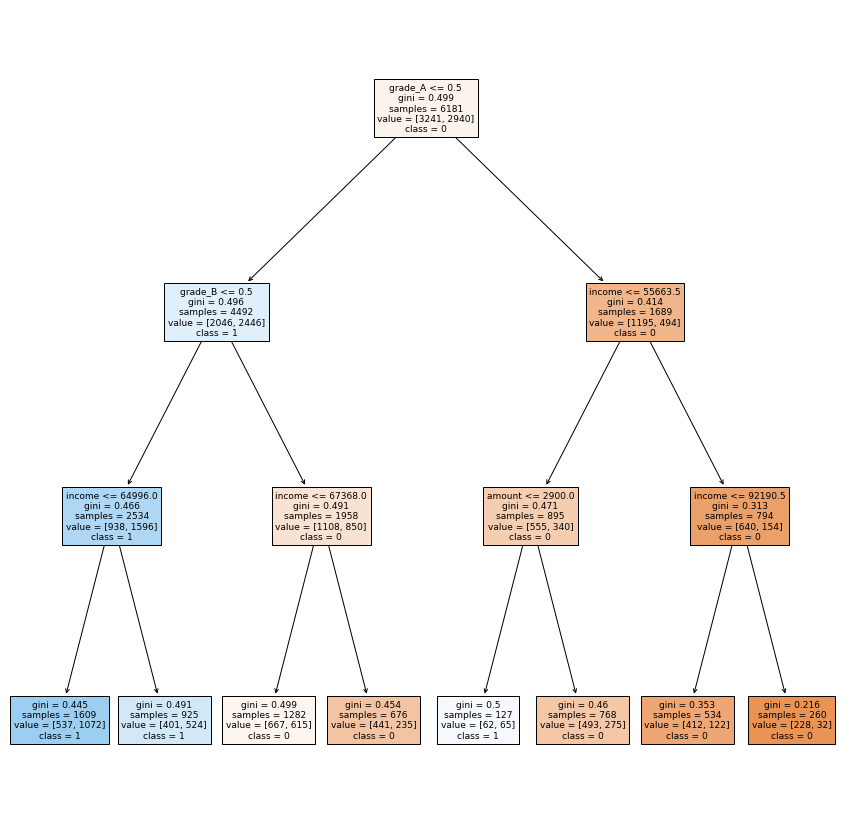

In [58]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf,feature_names=x.columns,
              class_names=['0','1'],
              filled=True )


In [59]:
model2 = model_selection.GridSearchCV(clf,param_grid={'max_depth':[2,3,4,5,6]})
model2.fit(xtrain,ytrain)


GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, random_state=321),
             param_grid={'max_depth': [2, 3, 4, 5, 6]})

In [60]:
model2.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=321)